In [67]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.feature
trnImages = np.load('trnImage.npy')
tstImages = np.load('tstImage.npy')
trnLabels = np.load('trnLabel.npy')
tstLabels = np.load('tstLabel.npy')
trnidx = 1000

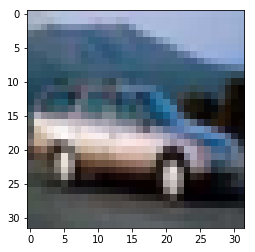

In [68]:
plt.imshow(trnImages[:,:,:,trnidx])

In [69]:
def computeFeatures(image):
    # This function computes the HOG features with the parsed hyperparameters and returns the features as hog_feature. 
    # By setting visualize=True we obtain an image, hog_as_image, which can be plotted for insight into extracted HOG features.
    hog_feature, hog_as_image = skimage.feature.hog(image, visualize=True, block_norm='L2-Hys')
    return hog_feature, hog_as_image

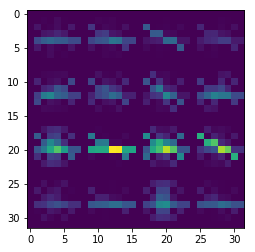

(324,)


In [70]:
# Extract the features from a single image
features, hog_image = computeFeatures(trnImages[:,:,:,trnidx])

plt.imshow(hog_image)
plt.show(block=False)

print(features.shape)

In [71]:
train_num_images = trnImages[0,0,0,:].size
train_hog_features = np.zeros((train_num_images, 324))
for i in range(0, train_num_images, 1):
    train_hog_features[i] = skimage.feature.hog(trnImages[:,:,:,i], visualize=False, block_norm='L2-Hys')
  
test_num_images = tstImages[0,0,0,:].size
test_hog_features = np.zeros((test_num_images, 324))
for i in range(0, test_num_images, 1):
    test_hog_features[i] = skimage.feature.hog(tstImages[:,:,:,i], visualize=False, block_norm='L2-Hys')

C:\Programs\Miniconda_Py3.5\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Percentage accuracy on testing set is: 49.40%


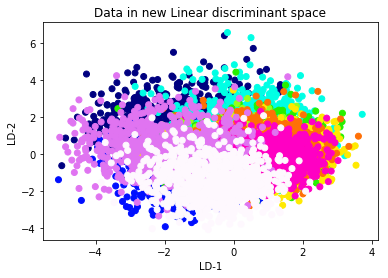

In [82]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
x = train_hog_features
y = trnLabels
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(x, y)
projected_data = lda.transform(x)

y_pred = lda.predict(test_hog_features)

accuracy = np.sum(np.equal(tstLabels.reshape(-1), y_pred)) / tstLabels.reshape(-1).shape[0] * 100
print('Percentage accuracy on testing set is: {0:.2f}%'.format(accuracy))

plt.figure()
plt.scatter(projected_data[:,0], projected_data[:,1], c=y.reshape(-1), cmap='gist_ncar', marker = 'o')#, c=y, 
plt.xlabel("LD-1")
plt.ylabel("LD-2")
plt.title("Data in new Linear discriminant space")
plt.show()
